# Frequent Pattern Mining

In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
# set the random seed
np.random.seed(15)

# 1. Generating mock dataset

In [5]:
# Generate mock dataset of shopping baskets with 1000 baskets and 6 items and allow NaN values
items = ['Milk', 'Bread', 'Eggs', 'Cheese', 'Butter', 'Yogurt', None]
baskets = np.random.choice(items , size=(1000, 6), p=[0.2, 0.2, 0.2, 0.15, 0.1, 0.1, 0.05], replace=True)
df_baskets = pd.DataFrame(baskets)
# Move the NaN value to the end of each row
df_baskets = df_baskets.apply(lambda x: x.sort_values().reset_index(drop=True), axis=1)
df_baskets.head()

,0,1,2,3,4,5
0,Bread,Bread,Butter,Eggs,Milk,Milk
1,Bread,Bread,Bread,Bread,Milk,Yogurt
2,Bread,Butter,Cheese,Milk,Milk,Yogurt
3,Bread,Bread,Butter,Eggs,Milk,None
4,Eggs,Eggs,Eggs,Milk,Milk,Yogurt


In [6]:
df_baskets

,0,1,2,3,4,5
0,Bread,Bread,Butter,Eggs,Milk,Milk
1,Bread,Bread,Bread,Bread,Milk,Yogurt
2,Bread,Butter,Cheese,Milk,Milk,Yogurt
3,Bread,Bread,Butter,Eggs,Milk,None
4,Eggs,Eggs,Eggs,Milk,Milk,Yogurt
...,...,...,...,...,...,...
995,Bread,Cheese,Milk,Milk,Yogurt,Yogurt
996,Bread,Butter,Butter,Butter,Cheese,Eggs
997,Eggs,Eggs,Eggs,Milk,Milk,None
998,Bread,Cheese,Eggs,Milk,Yogurt,None


# 2. Getting the frequent itemsets

In [7]:
# get the set of unique items
items = set(df_baskets.values.flatten())
items = list(items)
items.remove(None)
items

['Cheese', 'Bread', 'Eggs', 'Butter', 'Milk', 'Yogurt']

## 2.1. Experiment 1:

In [8]:
pd.get_dummies(df_baskets)

,0_Bread,0_Butter,0_Cheese,0_Eggs,0_Milk,1_Bread,1_Butter,1_Cheese,1_Eggs,1_Milk,...,4_Butter,4_Cheese,4_Eggs,4_Milk,4_Yogurt,5_Butter,5_Cheese,5_Eggs,5_Milk,5_Yogurt
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
996,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
997,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
998,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
encoder = OneHotEncoder(sparse=False)
x = encoder.fit_transform(df_baskets)
itemset = pd.DataFrame(x, columns=encoder.get_feature_names_out())
itemset

,x0_Bread,x0_Butter,x0_Cheese,x0_Eggs,x0_Milk,x1_Bread,x1_Butter,x1_Cheese,x1_Eggs,x1_Milk,...,x4_Eggs,x4_Milk,x4_Yogurt,x4_None,x5_Butter,x5_Cheese,x5_Eggs,x5_Milk,x5_Yogurt,x5_None
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
freq_items = apriori(itemset, min_support=0.2, use_colnames=True, verbose=1)
freq_items

Processing 63 combinations | Sampling itemset size 32


/Users/wadieskaf/miniconda3/envs/base_39/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.725,(x0_Bread)
1,0.373,(x1_Bread)
2,0.214,(x1_Butter)
3,0.241,(x1_Cheese)
4,0.288,(x2_Cheese)
5,0.326,(x2_Eggs)
6,0.380,(x3_Eggs)
7,0.317,(x3_Milk)
8,0.255,(x4_Eggs)
9,0.433,(x4_Milk)


## 2.2. Experiment 2:

In [11]:
# Encode the data better: move the name of the item to the column name then put 1 if the item is in the basket and 0 otherwise
df_baskets_2 = pd.DataFrame(columns=items)
for i, row in df_baskets.iterrows():
    df_baskets_2.loc[i] = 0
    for item in row:
        if item is not None:
            df_baskets_2.loc[i, item] = 1
df_baskets_2

,Cheese,Bread,Eggs,Butter,Milk,Yogurt
0,0,1,1,1,1,0
1,0,1,0,0,1,1
2,1,1,0,1,1,1
3,0,1,1,1,1,0
4,0,0,1,0,1,1
...,...,...,...,...,...,...
995,1,1,0,0,1,1
996,1,1,1,1,0,0
997,0,0,1,0,1,0
998,1,1,1,0,1,1


In [12]:
freq_items = apriori(df_baskets_2, min_support=0.2, use_colnames=True, verbose=1)
freq_items

Processing 20 combinations | Sampling itemset size 4


/Users/wadieskaf/miniconda3/envs/base_39/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.621,(Cheese)
1,0.725,(Bread)
2,0.748,(Eggs)
3,0.440,(Butter)
4,0.715,(Milk)
5,0.466,(Yogurt)
6,0.424,"(Bread, Cheese)"
7,0.445,"(Eggs, Cheese)"
8,0.254,"(Cheese, Butter)"
9,0.423,"(Cheese, Milk)"


In [13]:
rules = association_rules(freq_items, metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cheese),(Bread),0.621,0.725,0.424,0.682770,0.941751,-0.026225,0.866878
1,(Cheese),(Eggs),0.621,0.748,0.445,0.716586,0.958003,-0.019508,0.889159
2,(Cheese),(Milk),0.621,0.715,0.423,0.681159,0.952671,-0.021015,0.893864
3,(Bread),(Eggs),0.725,0.748,0.528,0.728276,0.973631,-0.014300,0.927411
4,(Eggs),(Bread),0.748,0.725,0.528,0.705882,0.973631,-0.014300,0.935000
5,(Butter),(Bread),0.440,0.725,0.298,0.677273,0.934169,-0.021000,0.852113
6,(Bread),(Milk),0.725,0.715,0.491,0.677241,0.947191,-0.027375,0.883013
7,(Milk),(Bread),0.715,0.725,0.491,0.686713,0.947191,-0.027375,0.877790
8,(Yogurt),(Bread),0.466,0.725,0.310,0.665236,0.917567,-0.027850,0.821474
9,(Butter),(Eggs),0.440,0.748,0.308,0.700000,0.935829,-0.021120,0.840000


# 3. Visualizing the results

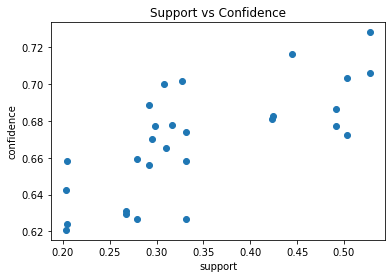

In [14]:
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

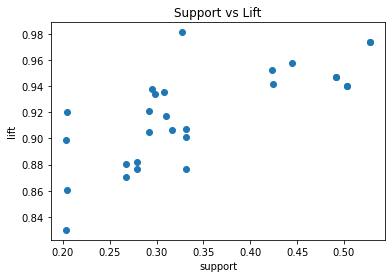

In [15]:
plt.scatter(rules['support'], rules['lift'])
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

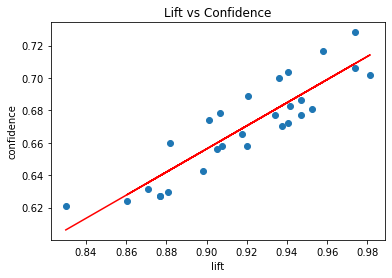

In [16]:
# fit a line
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
f = np.poly1d(fit)

plt.scatter(rules['lift'], rules['confidence'])
plt.plot(rules['lift'], f(rules['lift']), color='red')
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Lift vs Confidence')
plt.show()

# 3. Exercise

# 1) Download the dataset from [here](https://github.com/wadieskaf/ELTE_ITDS_Labs/blob/master/Datasets/groceries_baskets_datasets.csv)
# 2) Load and clean the dataset
# 3) Process the dataset
# 4) Get the frequent itemsets
# 5) Get the association rules
# 6) Visualize the results